<a href="https://colab.research.google.com/github/samer-glitch/samerelhajjhassan/blob/main/.Ongoing%20ThesisProject%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()




Saving Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv


Dataset Loaded - Time Elapsed: 0:00:00.000090
Labeling Function Applied - Time Elapsed: 0:00:05.569931
Categorical Labels Encoded - Time Elapsed: 0:00:05.574797
Features and Target Variable Defined - Time Elapsed: 0:00:05.578588
Data Split into Train and Test Sets - Time Elapsed: 0:00:05.587626
Non-numeric Columns Handled - Time Elapsed: 0:00:05.593279
Preprocessing Applied - Time Elapsed: 0:00:05.609057
Classifiers Fitted - Time Elapsed: 0:00:11.291506


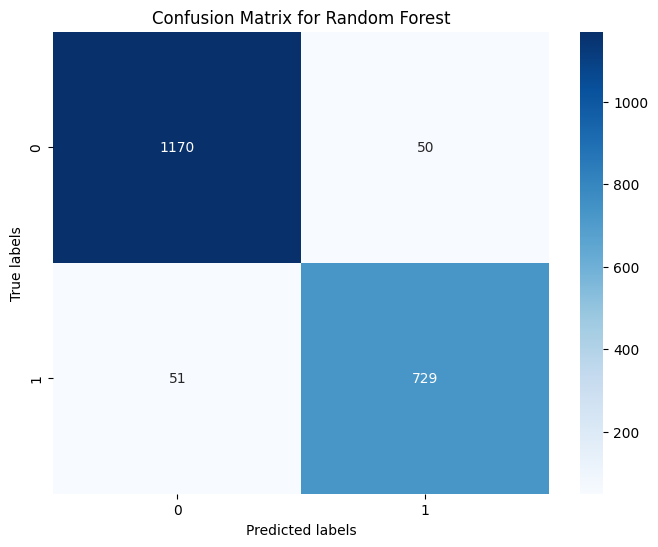

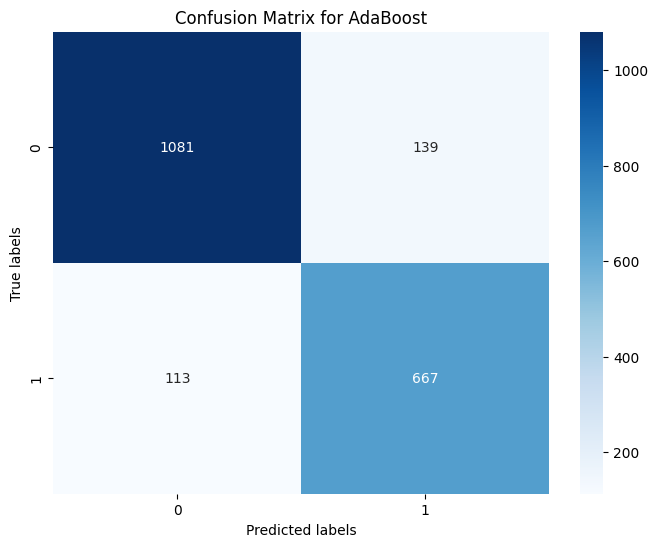

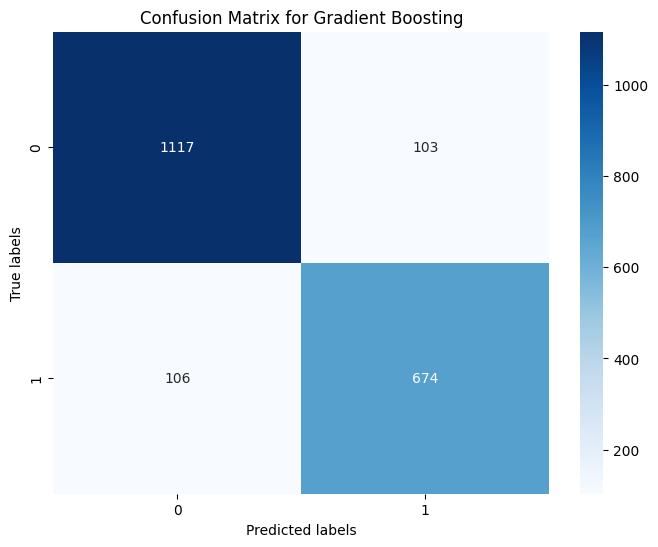


Random Forest Classifier:
Accuracy: 0.9495 
F1-Score: 0.9352148813341885

AdaBoost Classifier:
Accuracy: 0.874 
F1-Score: 0.8411097099621688

Gradient Boosting Classifier:
Accuracy: 0.8955 
F1-Score: 0.865767501605652


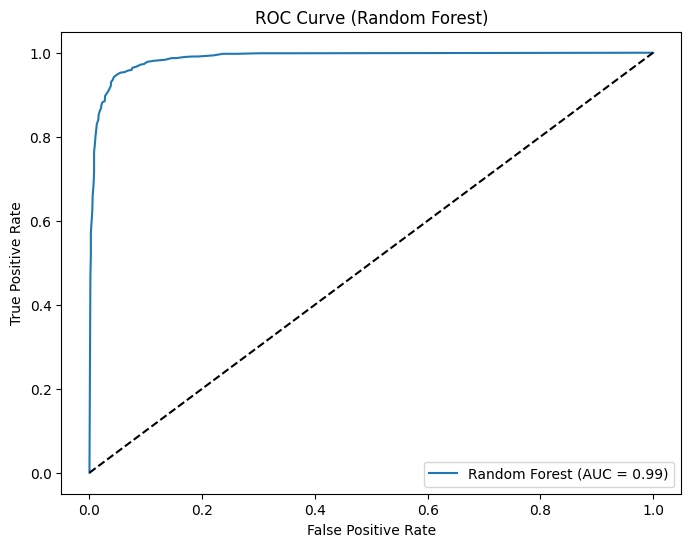

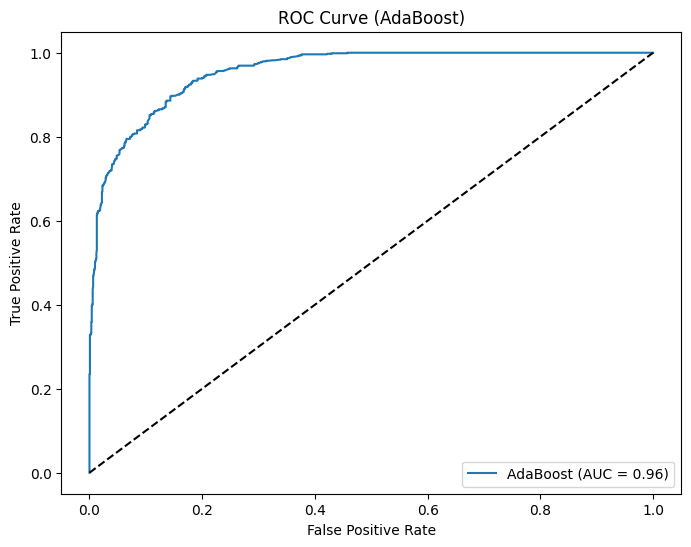

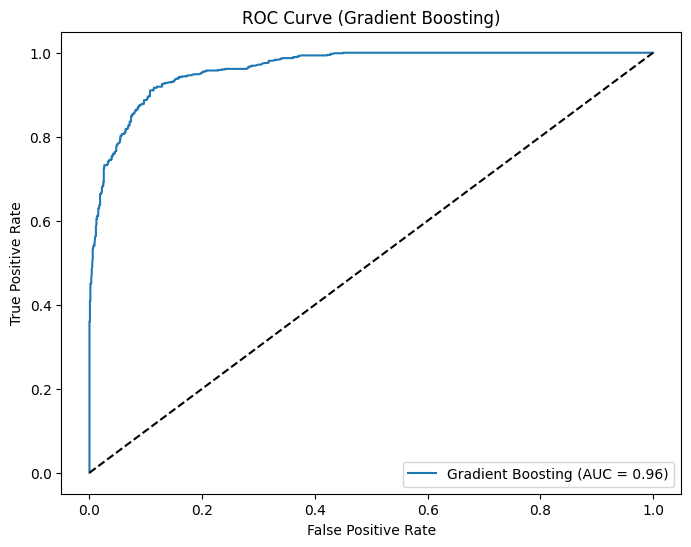


Process Completed - Time: 0:00:13.120286


In [5]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to record the current time since the overall start
def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv')

# Start the overall timer
overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded", overall_start_time)

def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

# Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

    # IP Address checks
    normal_src_ip_ranges = ['192.168.', '10.', '172.16.', '172.17.', '172.18.', '172.19.', '172.20.', '172.21.', '172.22.', '172.23.', '172.24.', '172.25.', '172.26.', '172.27.', '172.28.', '172.29.', '172.30.', '172.31.']
    df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
    df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'

    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'Mining', 'VPN', 'RemoteAccess']
    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'


    return df
# Apply the labeling function to the DataFrame
df = label_traffic(df)
record_time("Labeling Function Applied", overall_start_time)

# Encoding the categorical labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

# Define features and target variable
X = df.drop(columns=['traffic_label', 'category_encoded'])
y = df['category_encoded']
record_time("Features and Target Variable Defined", overall_start_time)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
record_time("Data Split into Train and Test Sets", overall_start_time)

# Identify non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns

# Remove non-numeric columns for simplicity
X_train = X_train.drop(non_numeric_columns, axis=1)
X_test = X_test.drop(non_numeric_columns, axis=1)
record_time("Non-numeric Columns Handled", overall_start_time)

# Apply preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
record_time("Preprocessing Applied", overall_start_time)

# Define the classifiers
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Fit the classifiers to the training data
rf_clf.fit(X_train_scaled, y_train)
ab_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)
record_time("Classifiers Fitted", overall_start_time)

# Make predictions
rf_predictions = rf_clf.predict(X_test_scaled)
ab_predictions = ab_clf.predict(X_test_scaled)
gb_predictions = gb_clf.predict(X_test_scaled)

# Calculate accuracy and F1-score
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_predictions), f1_score(y_test, rf_predictions)
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_predictions), f1_score(y_test, ab_predictions)
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_predictions), f1_score(y_test, gb_predictions)

# Calculate confusion matrices
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
ab_conf_matrix = confusion_matrix(y_test, ab_predictions)
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

# Function to plot Confusion Matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(rf_conf_matrix, "Random Forest")
plot_confusion_matrix(ab_conf_matrix, "AdaBoost")
plot_confusion_matrix(gb_conf_matrix, "Gradient Boosting")

# Print model performance
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1)
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1)
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1)

# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, model_name, auc_score):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend(loc='best')
    plt.show()

# Calculate ROC curve and AUC for Random Forest
rf_probs = rf_clf.predict_proba(X_test_scaled)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, "Random Forest", rf_auc)

# Calculate ROC curve and AUC for AdaBoost
ab_probs = ab_clf.predict_proba(X_test_scaled)[:, 1]
ab_fpr, ab_tpr, _ = roc_curve(y_test, ab_probs)
ab_auc = auc(ab_fpr, ab_tpr)
plot_roc_curve(ab_fpr, ab_tpr, "AdaBoost", ab_auc)

# Calculate ROC curve and AUC for Gradient Boosting
gb_probs = gb_clf.predict_proba(X_test_scaled)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)
plot_roc_curve(gb_fpr, gb_tpr, "Gradient Boosting", gb_auc)
print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)
